In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
import pathlib

DATA_DIR = pathlib.Path("../data/")
train_target = pd.read_csv(DATA_DIR.joinpath("pet_target_train.csv"), index_col="date", parse_dates=["date"])
test_target = pd.read_csv(DATA_DIR.joinpath("pet_test_timestamps.csv"), index_col="date", parse_dates=["date"])
daily = pd.read_csv(DATA_DIR.joinpath("pet_daily.csv"), index_col="date", parse_dates=["date"])
weekly = pd.read_csv(DATA_DIR.joinpath("pet_weekly.csv"), index_col="date", parse_dates=["date"])

In [73]:
import sys
sys.path.insert(1, '../scripts/')
import ultimate_first_group as ufg

In [8]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [37]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

MAPE on val:  0.04886362665184729
MAPE on train:  0.031151557517003062


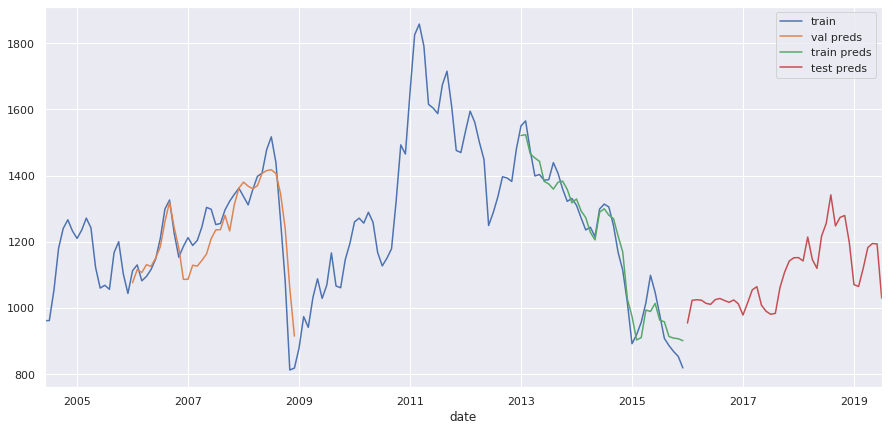

In [294]:
model = XGBRegressor(max_depth=5, n_estimators=100, objective='reg:squarederror', n_jobs=-1,
                    colsample_bytree=0.2, colsample_bylevel=0.2, reg_alpha=1, reg_lambda=10,
                    colsample_bynode=0.2, min_child_weight=10)
data = ufg.ultimate_pet(train_target, test_target, daily, weekly, model, shift_pet=6,
                       shift_daily=30, shift_weeks=6, val=True)

In [287]:
test_target['pet'] = data.loc[test_target.index]['pet']
test_target.to_csv('../submissions/pet_tuned2.csv')